In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## Lorenz Equations 
Forward Euler

### Background information on Lorenz63
Background information on Lorenz: [Lorenz63](https://en.wikipedia.org/wiki/Lorenz_system) 

Again we will start with a function that runs a forward model using Forward Euler. 


The forward Euler scheme for the Lorenz equations is as follows: 

(1)
\begin{equation}
x_{n+1} = x_n + \Delta t(\sigma(y_n -x_n))
\end{equation}
(2)
\begin{equation}
y_{n+1} = y_n + \Delta t(x_n\rho -z_n x_n - y_n)
\end{equation}
(3)
\begin{equation}
z_{n+1} = z_n + \Delta t(y_n x_n - \beta z_n)
\end{equation}

Below we will set the parameter values and define a function for Forward Euler.

### Forward Model Run and Variable Set Screws:


In [95]:
# Lorenz Class
class Lorenz:
    def __init__(self,initial):
        self.xs=initial[0]
        self.ys=initial[1]
        self.zs=initial[2]
        self.a=10 #sigma 
        self.B =8/3 #beta 
        self.r =28  #rho 
    
    def position(self,tstep,dt):
        xval = np.zeros((tstep,1))
        yval = np.zeros((tstep,1))
        zval = np.zeros((tstep,1))
        xval[0,0]=self.xs 
        yval[0,0]=self.ys
        zval[0,0]=self.zs
    
        for ii in range(0,tstep-1):
            xval[ii+1,0] = xval[ii,0]+dt*(self.a*(yval[ii,0]-xval[ii,0]))
            yval[ii+1,0] = yval[ii,0]+dt*(self.r*xval[ii,0]-xval[ii,0]*zval[ii,0]-yval[ii,0])
            zval[ii+1,0] = zval[ii,0]+dt*(xval[ii,0]*yval[ii,0]-self.B*zval[ii,0])
        return np.array([xval,yval,zval]).squeeze()
        
        

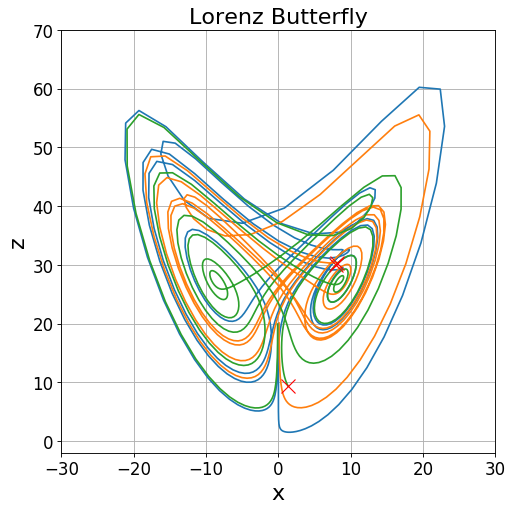

In [106]:
#we are launching 3 ensembles
################# comment or uncomment initial conditions: ###############
# chaotic regime
initial = np.array([0.001,0.0001,20])
xs1 = Lorenz(initial)
xs2 = Lorenz(initial+0.1)
xs3 = Lorenz(initial-0.1)

################# comment or uncomment initial conditions: ###############
# stable-ish regime
# initial = np.array([-10,-4,60])
# xs1 = Lorenz(initial)
# xs2 = Lorenz(initial+0.1)
# xs3 = Lorenz(initial-0.1)

# medium:

fcast=400 #number of time steps
dt=0.02 # time step increment


for x in range(1,fcast):
    if x==0:
        time.sleep(1)
    clear_output(wait=True)
    
    
    T = xs1.position(x,dt)
    T2 = xs2.position(x,dt)
    T3 = xs3.position(x,dt)
    
    # Tx = np.append(Tx,[Tx[-1]]);
    # Ty = np.append(Ty,[Ty[-1]]);
    # Tz = np.append(Tz,[Tz[-1]]);
    
    plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(T[0,],T[2,])
    plt.plot(T2[0,],T2[2,])
    plt.plot(T3[0,],T3[2,])
    
    if x==1:
        plt.plot(T[0],T[2],'rx',markersize=12)
        plt.plot(T2[0],T2[2],'rx',markersize=12)
        plt.plot(T3[0],T3[2],'rx',markersize=12)
    else:
        plt.plot(T[0,-1],T[2,-1],'rx',markersize=12)
        plt.plot(T2[0,-1],T2[2,-1],'rx',markersize=12)
        plt.plot(T3[0,-1],T3[2,-1],'rx',markersize=12)
          
    plt.xlabel('x',fontsize=20)
    plt.ylabel('z',fontsize=20)
    plt.title('Lorenz Butterfly',fontsize=20)
    plt.xlim([-30,30])
    plt.ylim([-2,70])
    plt.grid(True)

    plt.xticks(fontsize=15, rotation=0)
    plt.yticks(fontsize=15, rotation=0)
    plt.show()
    
    
    if x==1:
        time.sleep(3)
    else:
        time.sleep(0.000001)